In [1]:
!pip install polars

In [38]:
import glob
import polars as pl

dfs = []
for path in glob.glob("/kaggle/input/recommendation-dataset/sales_pers.purchase_history_daily_chunk_*.parquet"):
    df_chunk = pl.read_parquet(path)
    dfs.append(df_chunk)

history_df = pl.concat(dfs)

In [39]:
history_df.describe()

statistic,timestamp,user_id,item_id,event_type,event_value,price,date_key,quantity,customer_id,created_date,updated_date,channel,payment,location,discount,is_deleted
str,f64,str,str,str,f64,f64,f64,f64,f64,str,str,str,str,f64,f64,f64
"""count""",3.5729825e7,"""35729825""","""35729825""","""35729825""",3.5729825e7,3.5729825e7,3.5729825e7,3.5729825e7,3.5729825e7,"""35729825""","""35729825""","""35729825""","""35729825""",3.5729825e7,3.5729825e7,3.5729825e7
"""null_count""",0.0,"""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""",0.0,0.0,0.0
"""mean""",1.7199e9,null,null,null,1.508098,169188.742494,2.0241e7,1.508098,4.8713e6,"""2024-07-02 17:13:24.220955""","""2024-07-02 18:27:59.561504""",null,null,448.414508,17235.651914,0.0
"""std""",9.1568e6,null,null,null,2.264976,195539.88976,346.231465,2.264976,2.2697e6,null,null,null,null,247.505432,46673.708499,null
"""min""",1.7041e9,"""0000063a29e92d643437aa09266fdc…","""0000280000019""","""Purchase""",1.0,0.0444,2.0240101e7,1.0,14732.0,"""2024-01-01 06:44:59.037000""","""2024-01-01 06:44:59.233000""","""Android""","""Chuyển khoản""",16.0,0.0,0.0
"""25%""",1.7120e9,null,null,null,1.0,48316.3914,2.0240401e7,1.0,3.06641e6,"""2024-04-01 16:44:10.513000""","""2024-04-01 17:15:12.017000""",null,null,234.0,0.0,null
"""50%""",1.7199e9,null,null,null,1.0,87000.0,2.0240702e7,1.0,5.373736e6,"""2024-07-02 19:06:52.293000""","""2024-07-02 19:42:24.550000""",null,null,439.0,0.0,null
"""75%""",1.7279e9,null,null,null,1.0,244000.0,2.0241002e7,1.0,6.853734e6,"""2024-10-02 19:55:22.447000""","""2024-10-02 20:24:53.813000""",null,null,653.0,15000.0,null
"""max""",1.7357e9,"""fffff7e197ebf5c523fa686e6a305c…","""7352000000004""","""Purchase""",240.0,2.099e7,2.0241231e7,240.0,8.208027e6,"""2024-12-31 22:35:19.510000""","""2025-09-27 21:25:22.960000""","""iOS""","""ZaloPay""",1036.0,7.995e6,0.0


price: 100%|██████████| 72/72 [02:26<00:00,  2.04s/it]


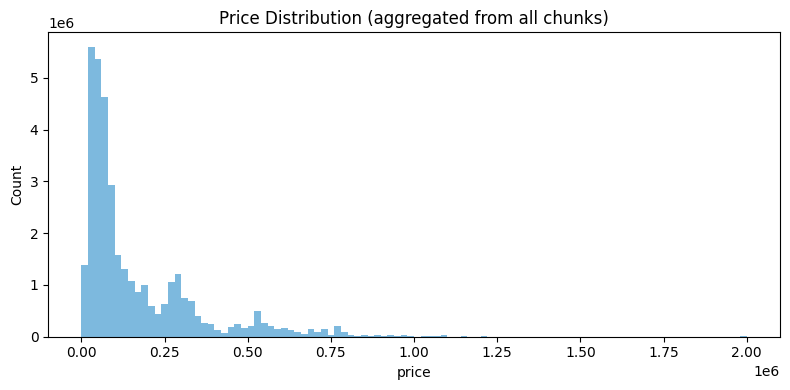

discount: 100%|██████████| 72/72 [02:24<00:00,  2.01s/it]


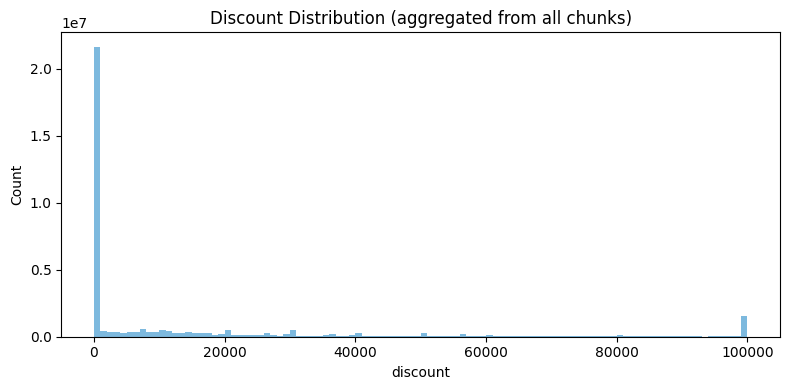

quantity: 100%|██████████| 72/72 [01:13<00:00,  1.02s/it]


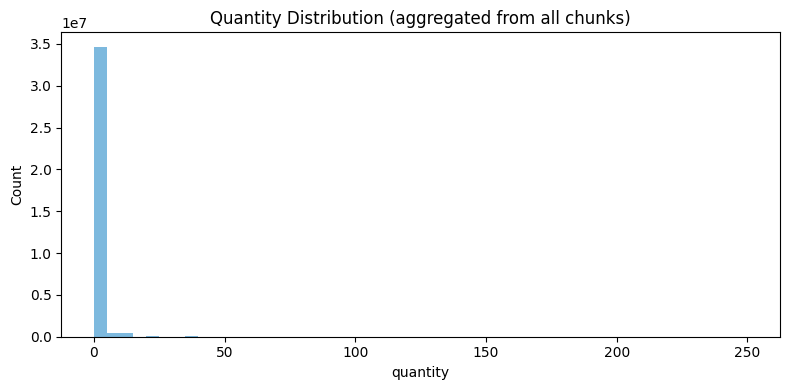

event_value: 100%|██████████| 72/72 [02:18<00:00,  1.93s/it]


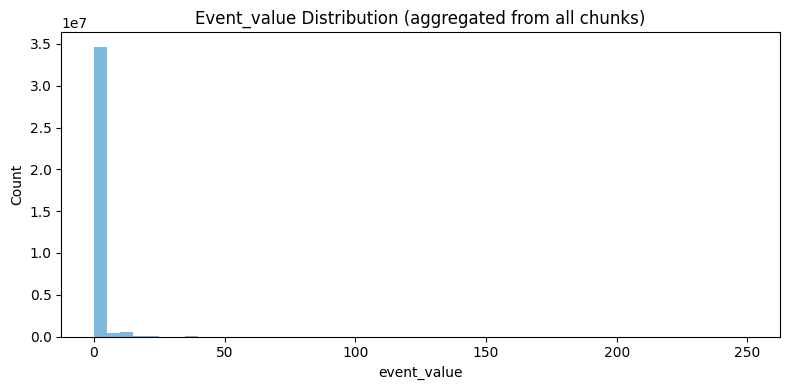

In [7]:
cols = ["price", "discount", "quantity", "event_value"]
bins_dict = {
    "price": np.linspace(0, 2_000_000, 101),
    "discount": np.linspace(0, 100_000, 101),
    "quantity": np.linspace(0, 250, 51),
    "event_value": np.linspace(0, 250, 51),
}

for col in cols:
    bins = bins_dict[col]
    hist_sum = np.zeros(len(bins) - 1)
    
    for path in tqdm(files, desc=f"{col}"):
        df = pd.read_parquet(path)
        counts, _ = np.histogram(df[col].clip(bins[0], bins[-1]), bins=bins)
        hist_sum += counts
        del df
    
    plt.figure(figsize=(8,4))
    plt.bar((bins[:-1]+bins[1:])/2, hist_sum, width=(bins[1]-bins[0]), color="#7DB9DE")
    plt.title(f"{col.capitalize()} Distribution (aggregated from all chunks)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

- Biến price có phân phối lệch phải mạnh, phần lớn giao dịch nằm trong khoảng 0 – 200 000 VND,
chỉ một tỷ lệ nhỏ (< 1%) đạt tới 1 – 2 triệu VND.
Trung vị giá khoảng 87 000 VND, trung bình cao hơn do ảnh hưởng của outlier.
Dữ liệu cần được log-transform hoặc chuẩn hóa theo phân vị trước khi dùng trong mô hình học máy.

- Mức giảm giá (discount) có phân phối rất lệch phải, tập trung mạnh ở giá trị 0.
Điều này cho thấy phần lớn giao dịch không có khuyến mãi, và chỉ một phần nhỏ có giảm giá.
Nên chuyển thành biến nhị phân (có/không giảm giá), hoặc log-transform để giảm ảnh hưởng của outlier.
Cần kiểm tra discount > price để loại giá trị bất hợp lý.

- Số lượng sản phẩm (quantity) chủ yếu là 1 sản phẩm mỗi đơn hàng, thể hiện hành vi mua lẻ phổ biến.
Phân phối cực lệch phải (đa số nhỏ, vài outlier rất lớn).
Có thể cắt ngưỡng trên (ví dụ quantity > 20) để loại bỏ giá trị bất thường.
Ngoài ra, có thể dùng quantity làm trọng số tương tác (interaction weight) trong hệ gợi ý.

- Giá trị sự kiện (event_value) có phân phối tương tự quantity, tập trung gần 0 và giảm nhanh ở các giá trị cao.
Điều này cho thấy hai biến có thể biểu diễn cùng một khái niệm hành vi (mức độ mua hoặc tương tác).
Cần kiểm tra tương quan giữa event_value và quantity để quyết định giữ lại một trong hai.

In [13]:
import polars as pl

df = pl.scan_parquet("/kaggle/input/recommendation-dataset/sales_pers.purchase_history_daily_chunk_*.parquet")

corr_df = (
    df.select(pl.corr("quantity", "event_value").alias("pearson_corr"))
    .collect(streaming=True)
)

print(corr_df)

/tmp/ipykernel_37/2107463333.py:7: DeprecationWarning: The argument `streaming=True` is deprecated and is being replaced by the `engine` argument.
  .collect(streaming=True)
/tmp/ipykernel_37/2107463333.py:7: DeprecationWarning: The old streaming engine is being deprecated and will soon be replaced by the new streaming engine. Starting Polars version 1.23.0 and until the new streaming engine is released, the old streaming engine may become less usable. For people who rely on the old streaming engine, it is suggested to pin your version to before 1.23.0.

More information on the new streaming engine: https://github.com/pola-rs/polars/issues/20947
  .collect(streaming=True)


shape: (1, 1)
┌──────────────┐
│ pearson_corr │
│ ---          │
│ f64          │
╞══════════════╡
│ 1.0          │
└──────────────┘


Hai biến quantity và event_value có hệ số tương quan Pearson bằng 1.0, thể hiện mối quan hệ tuyến tính hoàn hảo.
Điều này chứng tỏ hai biến về bản chất biểu diễn cùng một thông tin (mức độ mua hàng hoặc trọng số tương tác).
Vì vậy, để tránh trùng lặp dữ liệu và đa cộng tuyến trong mô hình, chỉ nên giữ lại một trong hai biến, ví dụ quantity, cho các phân tích và huấn luyện tiếp theo.

payment: 100%|██████████| 72/72 [00:04<00:00, 16.58it/s]


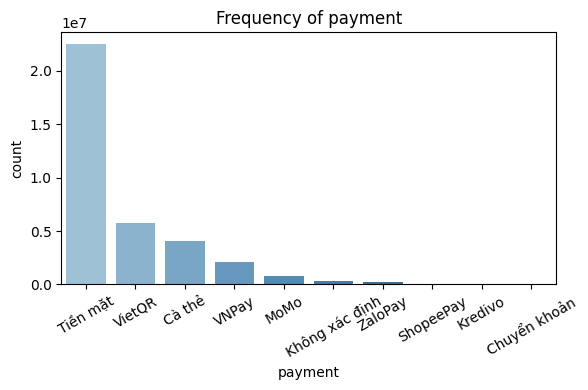

channel: 100%|██████████| 72/72 [00:04<00:00, 17.30it/s]


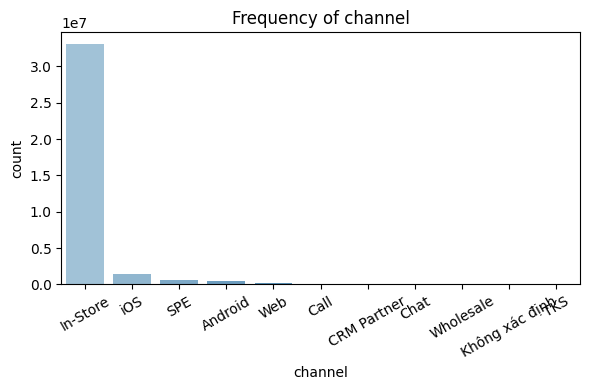

event_type: 100%|██████████| 72/72 [00:03<00:00, 18.27it/s]
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


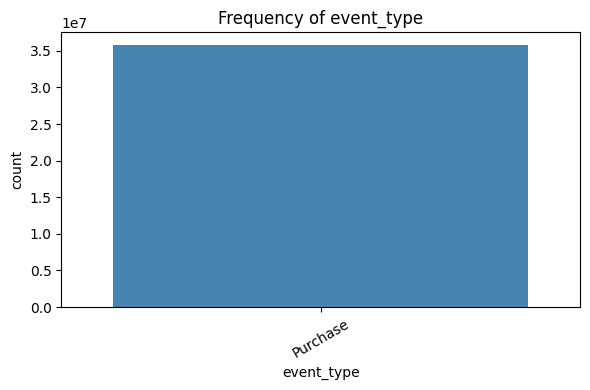

In [8]:
import seaborn as sns

cat_cols = ["payment", "channel", "event_type"]

for col in cat_cols:
    value_counts = {}
    for path in tqdm(files, desc=col):
        df = pd.read_parquet(path, columns=[col])
        vc = df[col].value_counts()
        for k, v in vc.items():
            value_counts[k] = value_counts.get(k, 0) + v
        del df

    pdf = pd.DataFrame(list(value_counts.items()), columns=[col, "count"]).sort_values("count", ascending=False)
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y="count", data=pdf, palette="Blues_d")
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

- Biến channel thể hiện sự thống trị tuyệt đối của kênh “In-Store”, chứng tỏ phần lớn dữ liệu đến từ môi trường bán hàng trực tiếp.
Các kênh còn lại có tần suất rất thấp, cần chuẩn hóa và gộp nhóm để tránh mất cân bằng khi mã hóa.
Biến này cung cấp thông tin quan trọng cho mô hình gợi ý – vì người mua hàng tại cửa hàng có thể có hành vi khác với người mua online.

- Cột event_type chỉ chứa duy nhất giá trị "Purchase", cho thấy tập dữ liệu này lưu lại chỉ các giao dịch thành công, không bao gồm các loại sự kiện khác như AddToCart, View, hoặc Cancel.
Do đó, cột này không mang thông tin phân biệt và có thể được loại bỏ trong các bước phân tích tiếp theo.

100%|██████████| 72/72 [01:43<00:00,  1.44s/it]


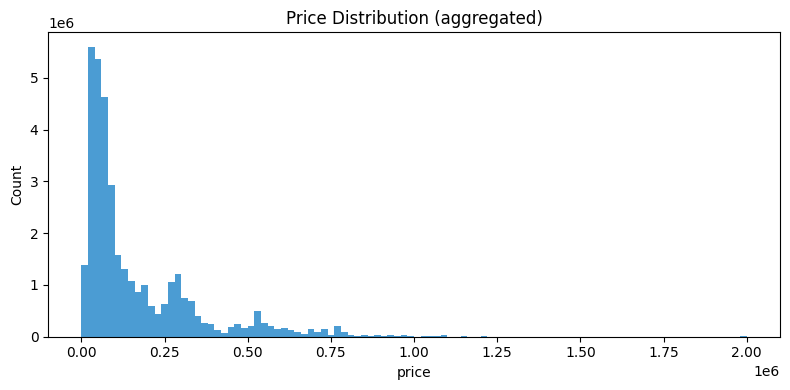

100%|██████████| 72/72 [01:43<00:00,  1.44s/it]


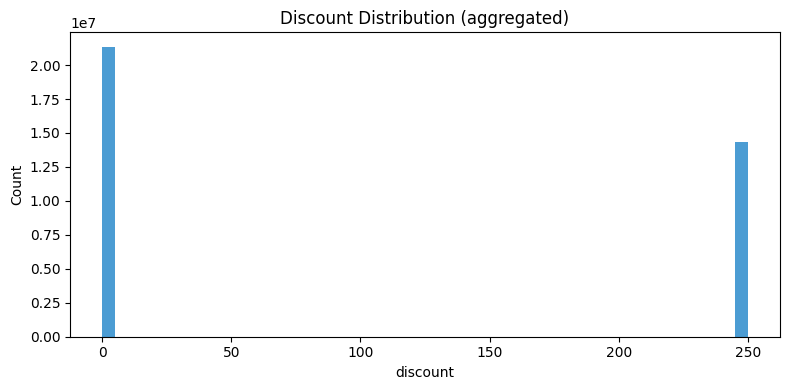

100%|██████████| 72/72 [00:01<00:00, 39.12it/s]


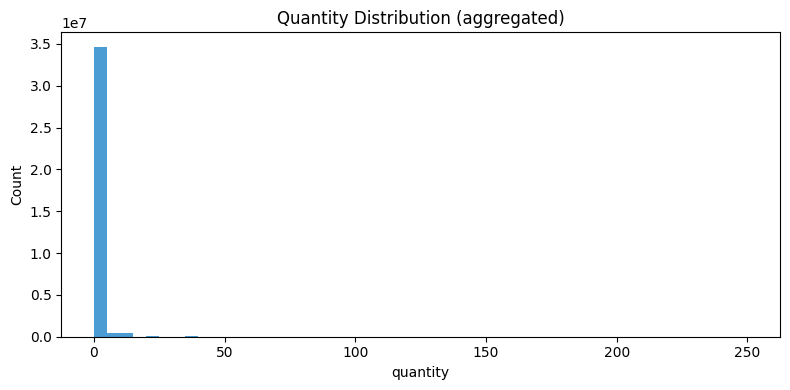

100%|██████████| 72/72 [01:34<00:00,  1.32s/it]


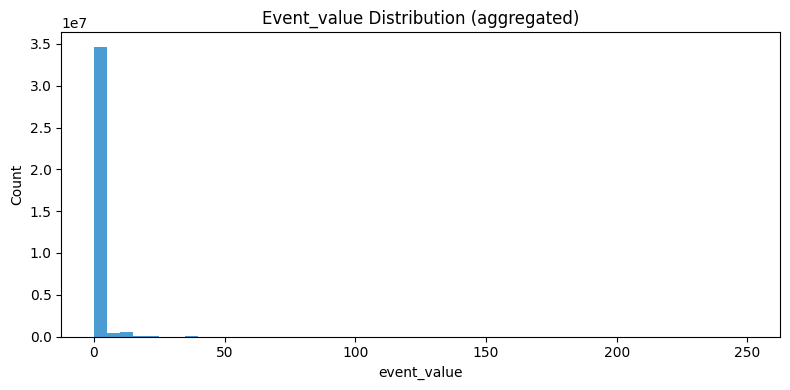

In [11]:
import polars as pl
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import glob

files = sorted(glob.glob("/kaggle/input/recommendation-dataset/sales_pers.purchase_history_daily_chunk_*.parquet"))

for col in ["price", "discount", "quantity", "event_value"]:
    bins = np.linspace(0, 2_000_000, 101) if col == "price" else np.linspace(0, 250, 51)
    hist_sum = np.zeros(len(bins) - 1)

    for path in tqdm(files):
        df = pl.read_parquet(path, columns=[col])
        df = df.filter(pl.col(col).is_not_null())
        counts, _ = np.histogram(df[col].to_numpy().clip(bins[0], bins[-1]), bins=bins)
        hist_sum += counts
        del df

    plt.figure(figsize=(8,4))
    plt.bar((bins[:-1]+bins[1:])/2, hist_sum, width=(bins[1]-bins[0]), color="#4B9CD3")
    plt.title(f"{col.capitalize()} Distribution (aggregated)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_37/1580025971.py:12: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/tmp/ipykernel_37/1580025971.py:14: DeprecationWarning: The argument `streaming=True` is deprecated and is being replaced by the `engine` argument.
  .collect(streaming=True)
/tmp/ipykernel_37/1580025971.py:14: DeprecationWarning: The old streaming engine is being deprecated and will soon be replaced by the new streaming engine. Starting Polars version 1.23.0 and until the new streaming engine is released, the old streaming engine may become less usable. For people who rely on the old streaming engine, it is suggested to pin your version to before 1.23.0.

More information on the new streaming engine: https://github.com/pola-rs/polars/issues/20947
  .collect(streaming=True)


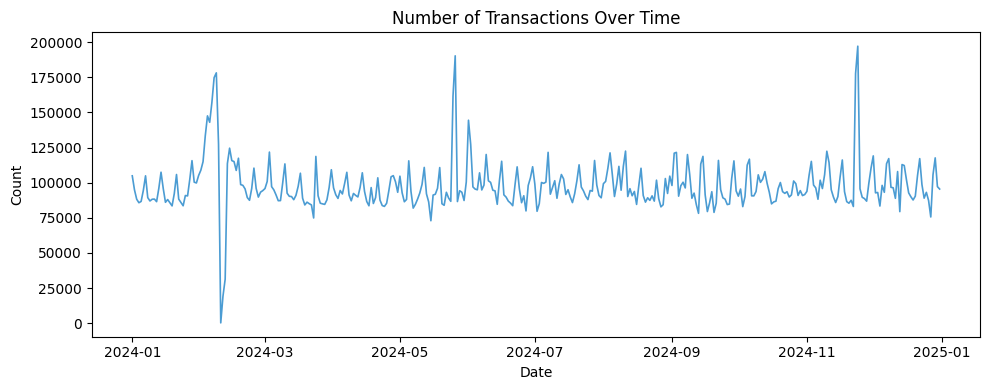

In [12]:
import polars as pl
import matplotlib.pyplot as plt

# Đọc toàn bộ thư mục các file parquet bằng lazy mode
df = pl.scan_parquet("/kaggle/input/recommendation-dataset/sales_pers.purchase_history_daily_chunk_*.parquet")

# Tính tổng số giao dịch theo date_key
trend = (
    df
    .select(pl.col("date_key"))
    .group_by("date_key")
    .agg(pl.count().alias("count"))
    .sort("date_key")
    .collect(streaming=True)
)

# Chuyển cột date_key sang dạng datetime (Polars → Pandas)
trend = trend.with_columns(
    pl.col("date_key").cast(pl.Utf8).str.strptime(pl.Date, "%Y%m%d", strict=False)
)

pdf = trend.to_pandas()

# Vẽ biểu đồ bằng matplotlib
plt.figure(figsize=(10,4))
plt.plot(pdf["date_key"], pdf["count"], linewidth=1.2, color="#4B9CD3")
plt.title("Number of Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Biến date_key phản ánh xu hướng thời gian rõ ràng với các chu kỳ cao điểm bán hàng định kỳ theo tháng.
Biểu đồ cho thấy:
* Có 3 giai đoạn bùng nổ giao dịch, tương ứng với các dịp khuyến mãi lớn trong năm 2024.
* Ngoài các đợt đó, khối lượng giao dịch duy trì ổn định quanh mức trung bình.
* Một số đoạn giảm mạnh về 0 có thể do thiếu dữ liệu hoặc ngưng hoạt động tạm thời.

Đây là đặc trưng quan trọng của dữ liệu thời gian, cho phép:
* Phát hiện tính mùa vụ (seasonality).
* Hỗ trợ dự báo nhu cầu hoặc doanh số trong hệ gợi ý hoặc mô hình dự báo bán hàng.

In [1]:
import glob
import polars as pl

dfs = []
for path in glob.glob("/kaggle/input/recommendation-dataset/sales_pers.item_chunk_*.parquet"):
    df_chunk = pl.read_parquet(path)
    dfs.append(df_chunk)

item_df = pl.concat(dfs)

In [2]:
item_df.describe()

statistic,p_id,item_id,price,category_l1_id,category_l1,category_l2_id,category_l2,category_l3_id,category_l3,category_id,category,description,brand,manufacturer,creation_timestamp,is_deleted,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,image_url,gender_target,age_group,item_type,gp,weight,color,size,origin,volume,material,sale_status,description_new
str,f64,str,f64,f64,str,f64,str,f64,str,f64,str,str,str,str,f64,f64,str,str,f64,str,str,str,str,str,str,f64,f64,str,str,str,str,str,f64,str
"""count""",27332.0,"""27332""",27332.0,27332.0,"""27332""",27332.0,"""27332""",27332.0,"""27332""",27332.0,"""27332""","""27332""","""27332""","""27332""",27332.0,27332.0,"""27332""","""27332""",26546.0,"""26546""","""0""","""27332""","""27332""","""27332""","""27332""",27332.0,0.0,"""27332""","""27332""","""27332""","""27332""","""27332""",27332.0,"""22317"""
"""null_count""",0.0,"""0""",0.0,0.0,"""0""",0.0,"""0""",0.0,"""0""",0.0,"""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0""",786.0,"""786""","""27332""","""0""","""0""","""0""","""0""",0.0,27332.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""5015"""
"""mean""",106317.679643,null,190456.829467,2836.189192,null,3719.039843,null,4876.768294,null,4920.712718,null,null,null,null,1.6225e9,0.0,"""2021-05-31 17:17:33.849833""","""2025-08-30 04:07:07.766157""",2.0,"""2025-07-18 18:00:25.086391""",null,null,null,null,null,49696.651226,null,null,null,null,null,null,0.167203,null
"""std""",25425.734073,null,511123.971813,1417.521137,null,1935.042044,null,2035.952741,null,1999.308355,null,null,null,null,7.5666e7,null,null,null,0.0,null,null,null,null,null,null,144155.68753,null,null,null,null,null,null,0.373164,null
"""min""",1675.0,"""0000280000019""",0.0,1.0,"""Babycare""",2.0,"""0-1Y""",14.0,"""A2 milk""",4.0,"""0-12M Bodysuit bé trai đùi""","""Với kiểu dáng đơn giản nhưng …","""137 Degrees""","""(L) Địa điểm kinh doanh 1 - Ch…",1.2983e9,0.0,"""2011-02-21 11:54:02.047000""","""2023-12-26 17:21:11.663000""",2.0,"""2025-07-18 17:59:29.898256""",null,"""Không xác định""","""Bé Gái""","""0-10M""","""BCS""",0.0,null,"""Bạc""","""0 tháng""",""" Singapore, Thụy Sĩ""","""1 lít""",""" Vải không dệt, bông cellulose…",0.0,"""Chi tiết sản phẩm …"
"""25%""",88905.0,null,49000.0,2788.0,null,2038.0,null,3516.0,null,3522.0,null,null,null,null,1.5755e9,null,"""2019-12-04 18:24:16.260000""","""2025-08-18 09:59:19.847000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,0.0,null,null,null,null,null,null,0.0,null
"""50%""",104510.0,null,119000.0,3292.0,null,3958.0,null,5254.0,null,5511.0,null,null,null,null,1.6358e9,null,"""2021-11-01 13:19:26.080000""","""2025-09-26 08:05:23.153000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,25047.0,null,null,null,null,null,null,0.0,null
"""75%""",120262.0,null,199000.0,3292.0,null,4571.0,null,6984.0,null,6988.0,null,null,null,null,1.6699e9,null,"""2022-12-01 15:40:42.260000""","""2025-09-27 00:05:36.233000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,65532.0,null,null,null,null,null,null,0.0,null
"""max""",167147.0,"""7497000000006""",2.099e7,7376.0,"""Đồ chơi & Sách""",7492.0,"""Đồ uống""",7493.0,"""Đồ hộp""",7501.0,"""Động vật mô hình""","""﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿Bỉm …","""Đức Thành""","""﻿Shantou City Chenghai Jia Ron…",1.7559e9,0.0,"""2025-08-22 17:35:14.377000""","""2025-10-01 08:05:42.990000""",2.0,"""2025-07-21 10:59:04.045058""",null,"""Không xác định""","""Unisex""","""[""Từ 6M"", ""Từ 9M"", ""Từ 1Y""]""","""Ứng dụng mẹ và bé""",5.54136e6,null,"""Đỏ""","""XXL(15-25kg) - 26 miếng""","""Ấn Độ, Bulgaria""","""hộp 3 lọ x 250ml""","""﻿100% cotton﻿<br>""",1.0,"""Xin lỗi, nhưng tôi không thể t…"


In [3]:
item_df.dtypes
item_df.null_count()

p_id,item_id,price,category_l1_id,category_l1,category_l2_id,category_l2,category_l3_id,category_l3,category_id,category,description,brand,manufacturer,creation_timestamp,is_deleted,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,image_url,gender_target,age_group,item_type,gp,weight,color,size,origin,volume,material,sale_status,description_new
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,786,786,27332,0,0,0,0,0,27332,0,0,0,0,0,0,5015


/tmp/ipykernel_37/3861815287.py:17: DeprecationWarning: The argument `streaming=True` is deprecated and is being replaced by the `engine` argument.
  for df_chunk in item_df.select(col).collect(streaming=True).iter_slices(100000):
/tmp/ipykernel_37/3861815287.py:17: DeprecationWarning: The old streaming engine is being deprecated and will soon be replaced by the new streaming engine. Starting Polars version 1.23.0 and until the new streaming engine is released, the old streaming engine may become less usable. For people who rely on the old streaming engine, it is suggested to pin your version to before 1.23.0.

More information on the new streaming engine: https://github.com/pola-rs/polars/issues/20947
  for df_chunk in item_df.select(col).collect(streaming=True).iter_slices(100000):


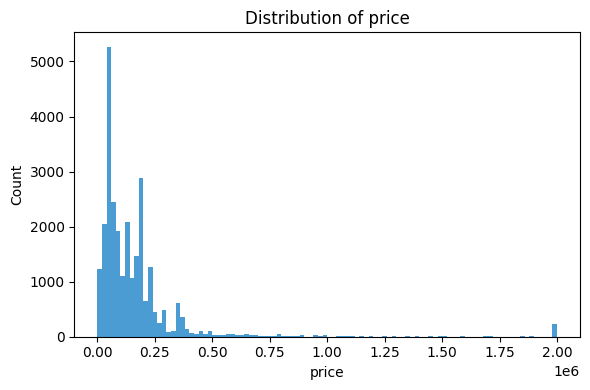

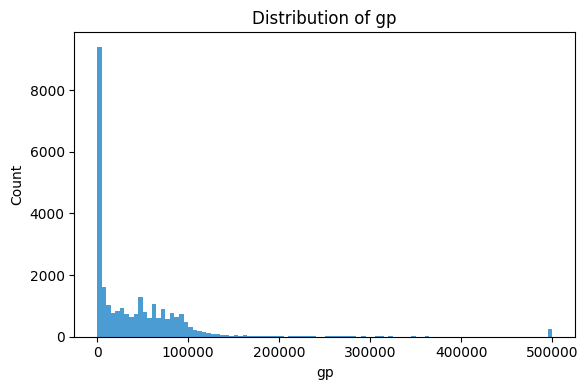

In [13]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

# đọc tất cả item
item_df = pl.scan_parquet("/kaggle/input/recommendation-dataset/sales_pers.item_chunk_*.parquet")

# chọn 2 cột numeric
cols = ["price", "gp"]

for col in cols:
    # tính histogram theo bin
    bins = np.linspace(0, 2_000_000, 101) if col == "price" else np.linspace(0, 500_000, 101)
    hist_sum = np.zeros(len(bins) - 1)

    # Polars streaming: lặp theo file (hoặc theo batch)
    for df_chunk in item_df.select(col).collect(streaming=True).iter_slices(100000):
        series = df_chunk[col].to_numpy()
        counts, _ = np.histogram(series.clip(bins[0], bins[-1]), bins=bins)
        hist_sum += counts

    # vẽ histogram
    plt.figure(figsize=(6,4))
    plt.bar((bins[:-1]+bins[1:])/2, hist_sum, width=(bins[1]-bins[0]), color="#4B9CD3")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

Hai biến price và gp đều có phân phối cực lệch phải, với nhiều outliers, phản ánh sự chênh lệch mạnh giữa các nhóm sản phẩm.
Việc áp dụng biến đổi logarit là cần thiết trước khi trích đặc trưng hoặc đưa vào mô hình dự đoán, nhằm đảm bảo dữ liệu ổn định và giảm sai lệch do giá trị cực đoan.

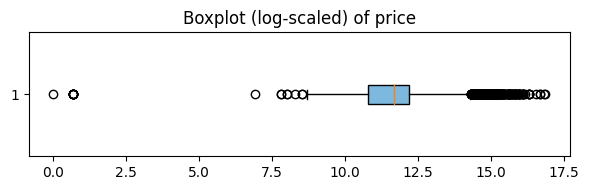

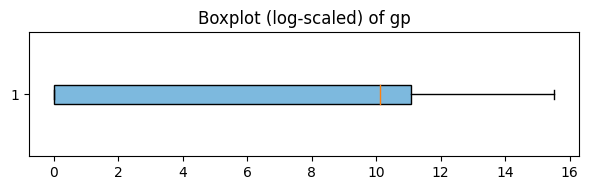

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl

for col in ["price", "gp"]:
    sample = (
        item_df
        .select(pl.col(col).cast(pl.Float64))  # lấy toàn bộ cột
        .collect()                             # thu toàn bộ dữ liệu vào RAM
    )

    data = sample[col].to_numpy().astype(float)
    data = data[np.isfinite(data)]
    data = np.clip(data, 0, None)

    plt.figure(figsize=(6,2))
    plt.boxplot(np.log1p(data), vert=False, patch_artist=True,
                boxprops=dict(facecolor="#7DB9DE"))
    plt.title(f"Boxplot (log-scaled) of {col}")
    plt.tight_layout()
    plt.show()


Sau khi áp dụng log-transform, cả hai biến price và gp đều trở nên ổn định, bớt lệch và giảm ảnh hưởng của các giá trị cực đoan.
Dữ liệu hiện đã phù hợp để dùng cho các bước phân tích và huấn luyện mô hình hồi quy hoặc phân loại mà không cần thêm biến đổi mạnh khác.

/tmp/ipykernel_37/2718047925.py:4: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  cat_cols = [c for c in cat_cols if c in item_df.columns]


🔹 Vẽ tần suất (Top 10) cho: category_l1


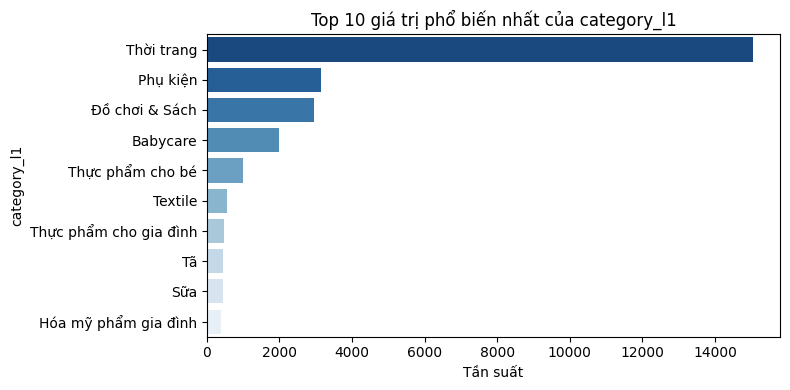

🔹 Vẽ tần suất (Top 10) cho: category_l2


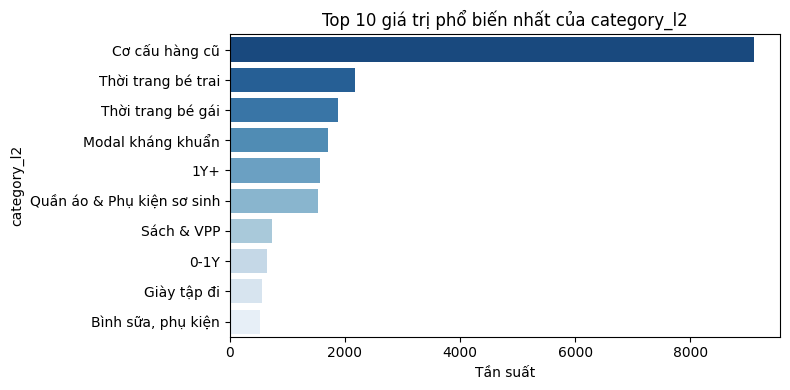

🔹 Vẽ tần suất (Top 10) cho: category_l3


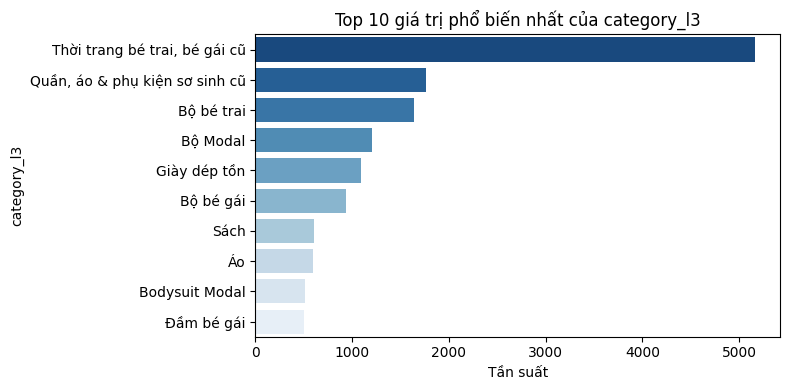

In [26]:
cat_cols = [
    "category_l1", "category_l2", "category_l3"
]
cat_cols = [c for c in cat_cols if c in item_df.columns]

for col in cat_cols:
    print(f"🔹 Vẽ tần suất (Top 10) cho: {col}")
    df_cat = (
    item_df
    .select(pl.col(col))
    .drop_nulls()
    .collect()         
    .to_pandas()
)
    top_values = df_cat[col].value_counts().head(10)

    plt.figure(figsize=(8,4))
    sns.barplot(x=top_values.values, y=top_values.index, palette="Blues_r")
    plt.title(f"Top 10 giá trị phổ biến nhất của {col}")
    plt.xlabel("Tần suất")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_37/259543607.py:4: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  cat_cols = [c for c in cat_cols if c in item_df.columns]


🔹 Vẽ tần suất (Top 10) cho: brand


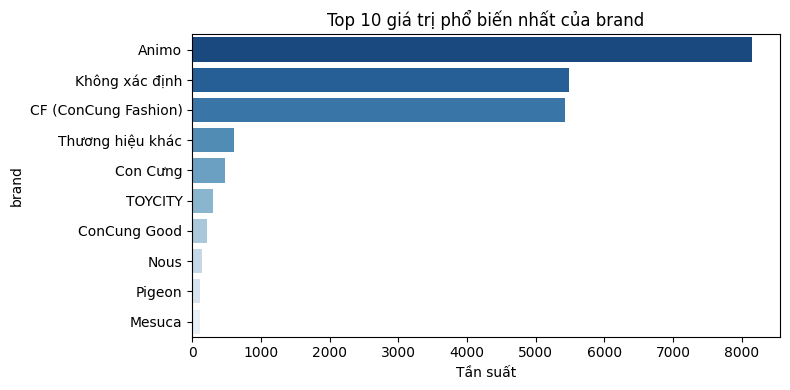

🔹 Vẽ tần suất (Top 10) cho: item_type


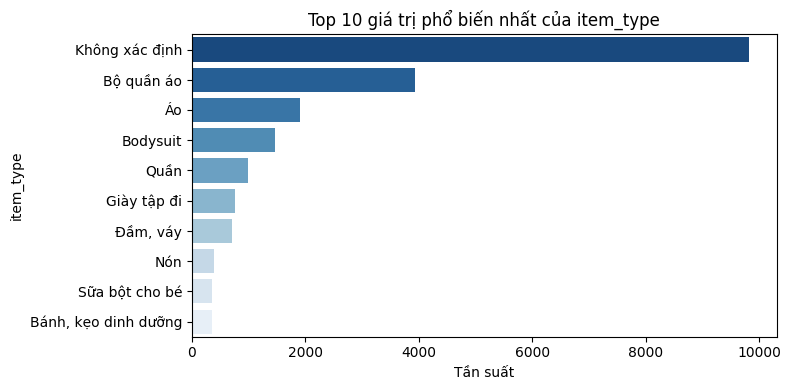

In [27]:
cat_cols = [
    "brand", "item_type"
]
cat_cols = [c for c in cat_cols if c in item_df.columns]

for col in cat_cols:
    print(f"🔹 Vẽ tần suất (Top 10) cho: {col}")
    df_cat = (
    item_df
    .select(pl.col(col))
    .drop_nulls()
    .collect()         
    .to_pandas()
)
    top_values = df_cat[col].value_counts().head(10)

    plt.figure(figsize=(8,4))
    sns.barplot(x=top_values.values, y=top_values.index, palette="Blues_r")
    plt.title(f"Top 10 giá trị phổ biến nhất của {col}")
    plt.xlabel("Tần suất")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

🔹 Vẽ tần suất (Top 10) cho: sale_status


/tmp/ipykernel_37/3960983858.py:4: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  cat_cols = [c for c in cat_cols if c in item_df.columns]


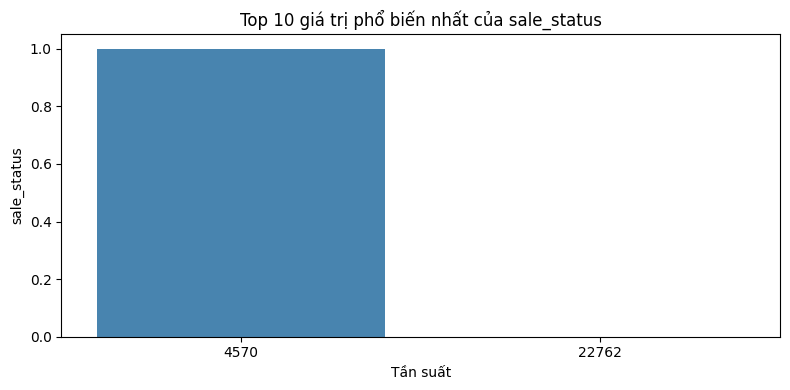

🔹 Vẽ tần suất (Top 10) cho: gender_target


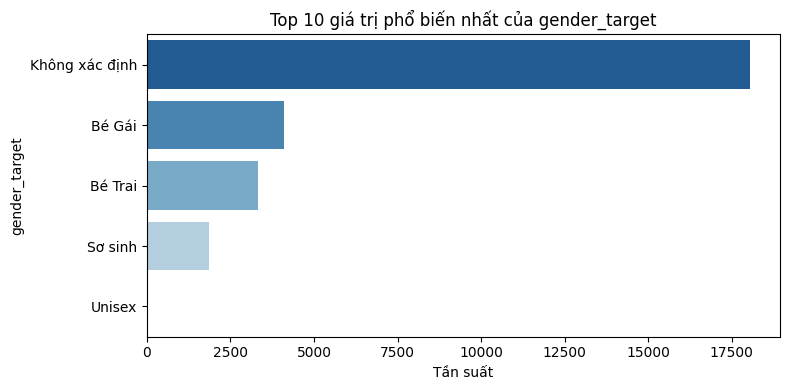

🔹 Vẽ tần suất (Top 10) cho: age_group


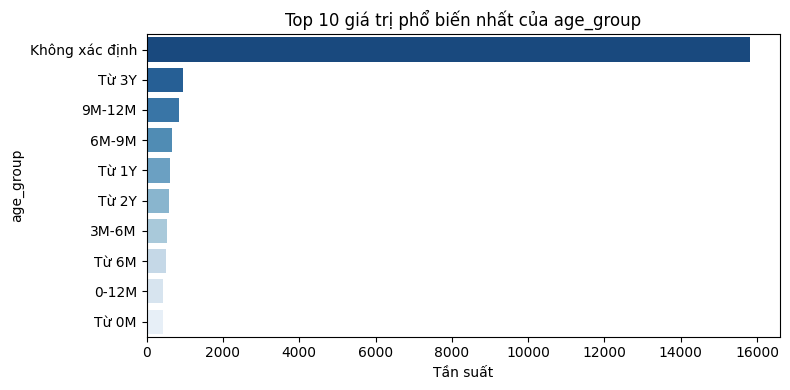

In [29]:
cat_cols = [
    "sale_status", "gender_target", "age_group",
]
cat_cols = [c for c in cat_cols if c in item_df.columns]

for col in cat_cols:
    print(f"🔹 Vẽ tần suất (Top 10) cho: {col}")
    df_cat = (
    item_df
    .select(pl.col(col))
    .drop_nulls()
    .collect()         
    .to_pandas()
)
    top_values = df_cat[col].value_counts().head(10)

    plt.figure(figsize=(8,4))
    sns.barplot(x=top_values.values, y=top_values.index, palette="Blues_r")
    plt.title(f"Top 10 giá trị phổ biến nhất của {col}")
    plt.xlabel("Tần suất")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_37/3062329901.py:4: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  cat_cols = [c for c in cat_cols if c in item_df.columns]


🔹 Vẽ tần suất (Top 10) cho: origin


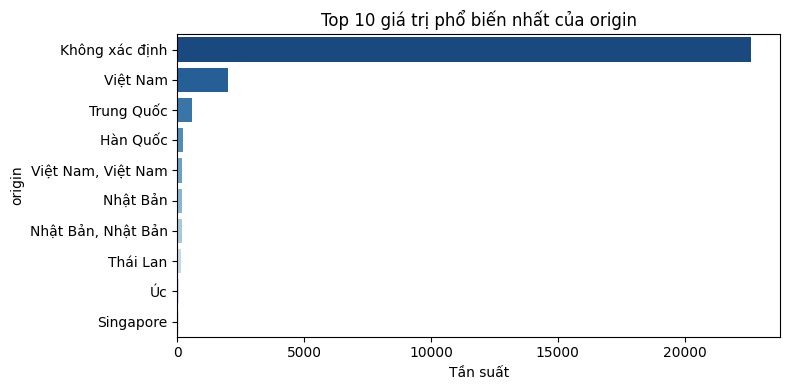

🔹 Vẽ tần suất (Top 10) cho: material


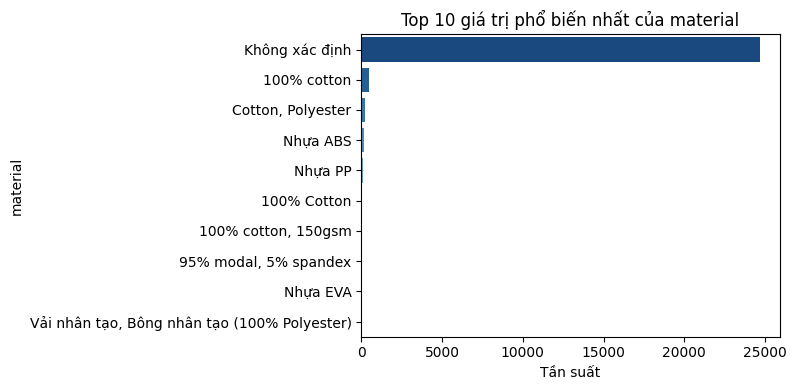

🔹 Vẽ tần suất (Top 10) cho: color


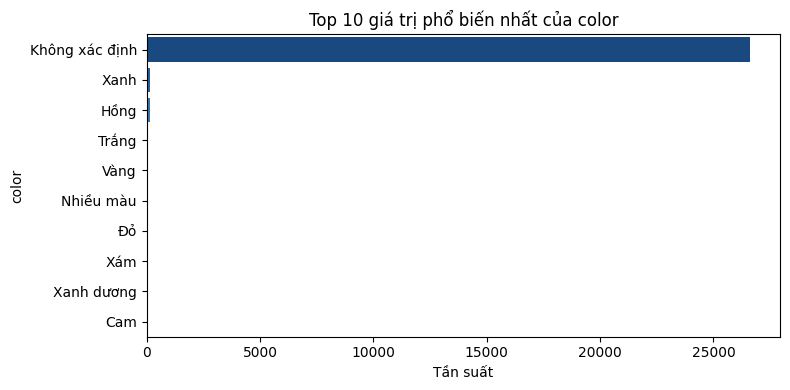

In [30]:
cat_cols = [
    "origin", "material", "color"
]
cat_cols = [c for c in cat_cols if c in item_df.columns]

for col in cat_cols:
    print(f"🔹 Vẽ tần suất (Top 10) cho: {col}")
    df_cat = (
    item_df
    .select(pl.col(col))
    .drop_nulls()
    .collect()         
    .to_pandas()
)
    top_values = df_cat[col].value_counts().head(10)

    plt.figure(figsize=(8,4))
    sns.barplot(x=top_values.values, y=top_values.index, palette="Blues_r")
    plt.title(f"Top 10 giá trị phổ biến nhất của {col}")
    plt.xlabel("Tần suất")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

[Datetime(time_unit='us', time_zone=None), Datetime(time_unit='us', time_zone=None), Datetime(time_unit='us', time_zone=None)]


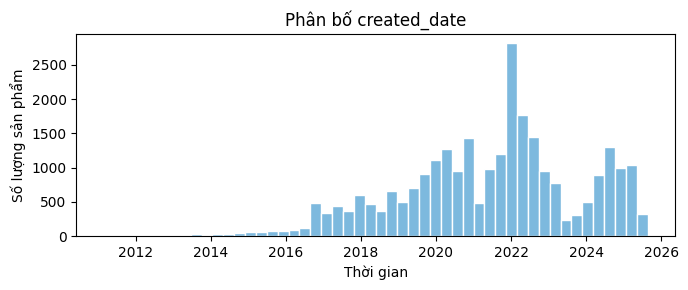

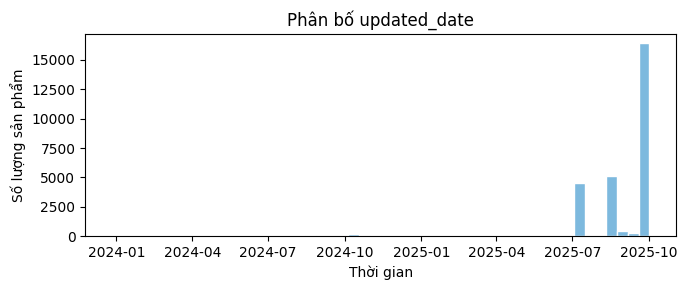

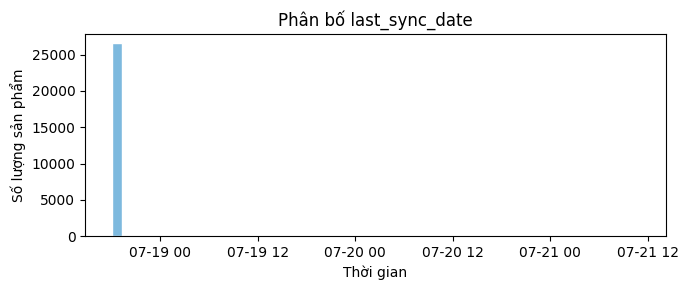

In [25]:
import polars as pl
import matplotlib.pyplot as plt

date_cols = ["created_date", "updated_date", "last_sync_date"]

schema = item_df.collect_schema()

parsed_cols = []
for c in date_cols:
    if c in schema.names():
        if schema[c] == pl.Utf8:  # chỉ parse nếu là string
            parsed_cols.append(pl.col(c).str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S", strict=False).alias(c))
        else:
            parsed_cols.append(pl.col(c))  # đã là datetime thì giữ nguyên

df_dates = item_df.select(parsed_cols).collect()
print(df_dates.dtypes)

for col in date_cols:
    if col in df_dates.columns:
        series = df_dates[col].drop_nulls().to_pandas()
        plt.figure(figsize=(7,3))
        plt.hist(series, bins=50, color="#7DB9DE", edgecolor="white")
        plt.title(f"Phân bố {col}")
        plt.xlabel("Thời gian"); plt.ylabel("Số lượng sản phẩm")
        plt.tight_layout()
        plt.show()

- Dữ liệu sản phẩm chủ yếu là hàng hóa được thêm trong vài năm gần đây, đảm bảo tính cập nhật và phù hợp cho phân tích. Dữ liệu được cập nhật rất gần thời điểm hiện tại => Có thể sinh thêm đặc trưng mới là tuổi đời sản phẩm
- Nên loại bỏ các biến last_sync_date, creation_timestamp vì trùng lặp hoặc không biến thiên.

In [31]:
import glob
import polars as pl

dfs = []
for path in glob.glob("/kaggle/input/recommendation-dataset/sales_pers.user_chunk_*.parquet"):
    df_chunk = pl.read_parquet(path)
    dfs.append(df_chunk)

user_df = pl.concat(dfs)

In [32]:
user_df.describe()

statistic,customer_id,gender,location,province,membership,timestamp,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,region,location_name,install_app,install_date,district,user_id,is_deleted
str,f64,str,f64,str,str,f64,str,str,f64,str,str,str,str,str,f64,str,str,f64
"""count""",4.573964e6,"""4573964""",4.573964e6,"""4573964""","""4573964""",4.573964e6,"""4573964""","""4573964""",4.235679e6,"""4235679""","""0""","""4573964""","""4573964""","""4573964""",4.573964e6,"""4573964""","""4573964""",4.573964e6
"""null_count""",0.0,"""0""",0.0,"""0""","""0""",0.0,"""0""","""0""",338285.0,"""338285""","""4573964""","""0""","""0""","""0""",0.0,"""0""","""0""",0.0
"""mean""",6.1266e6,null,554.053518,null,null,1.6712e9,"""2022-12-16 22:48:44.025646""","""2025-06-11 05:52:40.770554""",2.0,"""2025-07-16 15:20:34.188640""",null,null,null,null,1.6841e9,null,null,0.0
"""std""",2.4412e6,null,295.523361,null,null,7.9743e7,null,null,0.0,null,null,null,null,null,7.1374e7,null,null,null
"""min""",14732.0,"""Khác""",42.0,"""An Giang""","""Diamond""",1.3064e9,"""2011-05-25 21:11:51.677000""","""2019-06-30 08:38:47.100000""",2.0,"""2025-07-16 11:54:29.816986""",null,"""Bắc Trung Bộ""","""AGI - 110 Quốc Lộ 91""","""Android""",1.3063e9,""" Vũng Liêm""","""000004697bc1f0ecab42b6a3c2f0bc…",0.0
"""25%""",4.53268e6,null,302.0,null,null,1.6343e9,"""2021-10-15 10:09:34.280000""","""2025-07-07 15:33:10.201316""",2.0,"""2025-07-16 11:58:58.022193""",null,null,null,null,1.6550e9,null,null,null
"""50%""",6.843955e6,null,547.0,null,null,1.6960e9,"""2023-09-29 16:33:25.217000""","""2025-07-07 15:33:10.201316""",2.0,"""2025-07-16 12:03:34.550186""",null,null,null,null,1.7054e9,null,null,null
"""75%""",8.029649e6,null,765.0,null,null,1.7312e9,"""2024-11-09 14:38:22.223000""","""2025-08-02 10:54:03.860000""",2.0,"""2025-07-16 12:11:53.888687""",null,null,null,null,1.7366e9,null,null,null
"""max""",9.264159e6,"""Nữ""",1310.0,"""Đồng Tháp""","""Standard""",1.7593e9,"""2025-09-30 22:00:36.623000""","""2025-09-30 23:22:08.957000""",2.0,"""2025-07-21 11:19:29.058389""",null,"""Đồng bằng sông Cửu Long""","""ĐTH - Trần Hưng Đạo""","""iOS""",1.7592e9,"""Ứng Hòa""","""fffffbd469d500229dd000e9fc48ed…",0.0


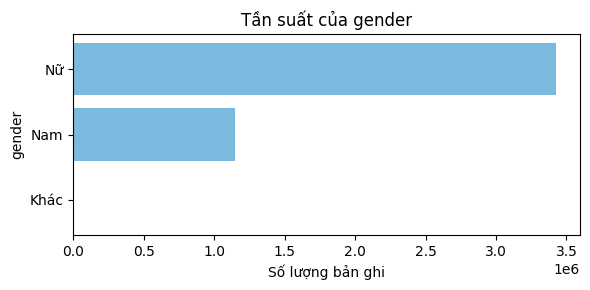

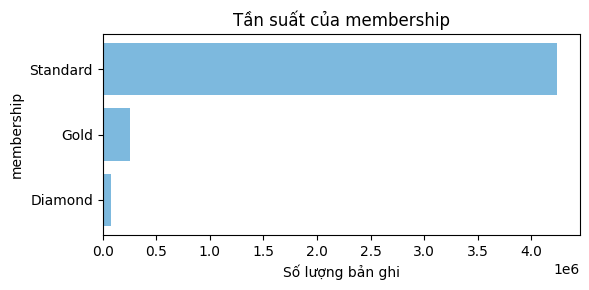

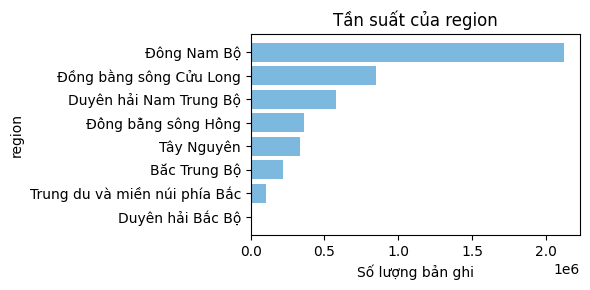

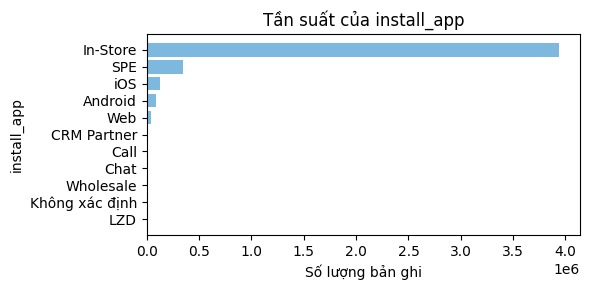

In [35]:
import polars as pl
import matplotlib.pyplot as plt

cat_cols = ["gender", "membership", "region", "install_app"]

for col in cat_cols:
    freq_df = (
        user_df
        .select(pl.col(col))
        .drop_nulls()
        .group_by(col)
        .agg(pl.len().alias("count"))  
        .sort("count", descending=True)
    )

    if isinstance(freq_df, pl.LazyFrame):
        freq_df = freq_df.collect()
    freq_df = freq_df.to_pandas()

    plt.figure(figsize=(6,3))
    plt.barh(freq_df[col].astype(str), freq_df["count"], color="#7DB9DE")
    plt.gca().invert_yaxis()
    plt.title(f"Tần suất của {col}")
    plt.xlabel("Số lượng bản ghi")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

📅 Phân bố theo thời gian: created_date
 - Kiểu dữ liệu hiện tại: Datetime(time_unit='us', time_zone=None)


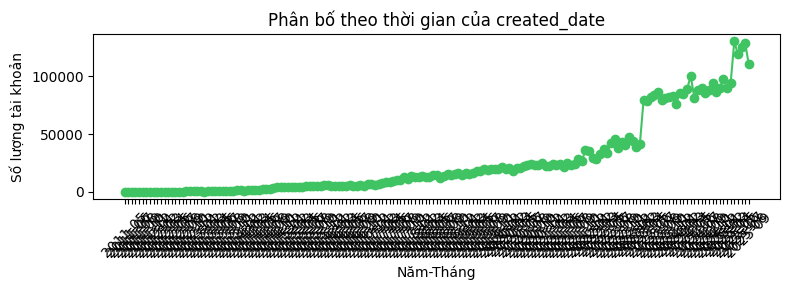

📅 Phân bố theo thời gian: install_date
 - Kiểu dữ liệu hiện tại: Int64


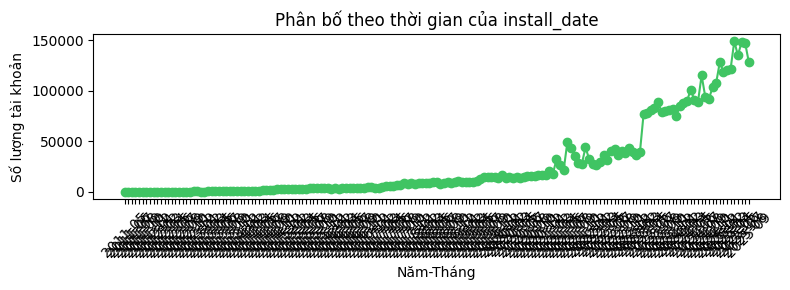

In [37]:
import polars as pl
import matplotlib.pyplot as plt

date_cols = ["created_date", "install_date"]

for col in date_cols:
    print(f"📅 Phân bố theo thời gian: {col}")

    dtype = user_df.schema.get(col)
    print(f" - Kiểu dữ liệu hiện tại: {dtype}")

    # 🔹 Tự động chuyển sang datetime nếu cần
    if dtype == pl.Utf8:
        df_time = user_df.with_columns(
            pl.col(col).str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S", strict=False)
        )
    elif dtype == pl.Int64:
        df_time = user_df.with_columns(
            pl.from_epoch(pl.col(col)).alias(col)  # ✅ chuyển từ timestamp (giây)
        )
    else:
        df_time = user_df

    # 🔹 Loại bỏ null và tạo cột tháng
    df_time = (
        df_time
        .drop_nulls(subset=[col])
        .with_columns(pl.col(col).dt.strftime("%Y-%m").alias("month"))
        .group_by("month")
        .agg(pl.len().alias("count"))
        .sort("month")
    )

    if isinstance(df_time, pl.LazyFrame):
        df_time = df_time.collect()
    df_time = df_time.to_pandas()

    # 🔹 Vẽ biểu đồ đường
    plt.figure(figsize=(8, 3))
    plt.plot(df_time["month"], df_time["count"], marker="o", color="#40c463")
    plt.title(f"Phân bố theo thời gian của {col}")
    plt.xlabel("Năm-Tháng")
    plt.ylabel("Số lượng tài khoản")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
